In [31]:
%matplotlib inline    

### USING MECHANISTIC PERFORMANCE/LOSS FACTORS MODELS (MLFM) 
### with PVPMC/PVLIB python - 1st data 2020-08-17T17+01:00 BST
#### Author : Steve Ransome SRCL ver : mlfm_pvpmc110_200817t17.ipynb

In [32]:
# get mlfm lib data and functions
from mlfm_lib_1 import * 

In [33]:
# list measurement files in your \meas directory
# optional naming convention used here are 
#     'institute_site_technology_moduleid_measfreq_duration_numrows' 

mlfm_file_names = [
        'test.csv',                             # test conditions module data       
        'nrel_cocoa_mSi_0188_15m_2011_416.csv', 
        'nrel_eugene_hit_05667_15m_2011_542.csv',
        'nrel_golden_cdte_75669_15m_2013_347.csv',
     ]  

    
# notes 
# =====
# the stc module data in ref\ref.csv presently need to be in the 
# same row order as meas files, so if you add or change meas files you'll need
# to manually update ref\ref.csv otherwise it will be normalised to the 
# wrong module e.g. present ref.csv is same order as above
#
# row	site	    module	id	  isc_ref  imp_ref  vmp_ref  voc_ref  ...
# 0     test            	5667  5.456	   5.1	    41.58	 50.11
# 1	    nrel_cocoa	msi	    118	  2.73	   2.522	18.16	 22.07
# 2	    nrel_eugene	hit 	5667  5.456	   5.1	    41.58	 50.11
# 3	    nrel_golden	cdte	75669 1.177	   1.02	    64.12	 87.66
# ...


#### Get user choice of module measurement data and reference values

In [34]:
meas_filename, meas, ref_sel, mod_row = \
    get_meas_filename(mlfm_file_names, show_data=True)


 show user row number and file names
0 = test.csv
1 = nrel_cocoa_mSi_0188_15m_2011_416.csv
2 = nrel_eugene_hit_05667_15m_2011_542.csv
3 = nrel_golden_cdte_75669_15m_2013_347.csv




 ## Choose module (0) to (3) :  3


file selected = nrel_golden_cdte_75669_15m_2013_347.csv


#### From measured and reference data derive normalised values

In [35]:
norm = mlfm_meas_to_norm(ref_sel, meas, mod_row)
#print(norm)

### Filter to remove outliers from normalised data and select by date

In [36]:
# user defined filter limits               low           high
gi_min =  0.1  # choose lowest irradiance, 0.1 (~all) to 0.7 (good weather only)
gi_max =  1.2  # choose highest irradiance,              1.2
lfm_min = 0.1  # choose lowest lfm values, 0.5 (~all) to 0.7 (good performance)
lfm_max = 1.2  # choose highest lfm values,              1.2

norm = norm[                                                          # usual limits
        (norm['date_time']>'2010' )  & (norm['date_time'] < '2016') & # 2000, 2021 
        (norm['isc'] >  lfm_min)     & (norm['isc'] <  lfm_max) &     
        (norm['rsc'] >  lfm_min)     & (norm['rsc'] <  lfm_max) &     
        (norm['roc'] >  lfm_min)     & (norm['roc'] <  lfm_max) &     
        (norm['voc'] >  lfm_min)     & (norm['voc'] <  lfm_max) &     
        (norm['prdc'] > lfm_min)     & (norm['prdc'] < lfm_max) &     
        (norm['gti_kw_m2'] > gi_min) & (norm['gti_kw_m2'] < gi_max)   
    ]  
      
# user_filter = name appended to the graphs filename 
# example '0.1gi1.2_0.5lfm' means '(0.1 < gi <1.2) and (0.5 < lfm_values)'
#
# if you alter this string so do not use illegal characters as it's
# added to the filename and the file then won't save
# https://docs.microsoft.com/en-us/windows/win32/fileio/naming-a-file
# PC illegal characters include --> < > : " / \ | ? * #

user_filter = str(gi_min) + 'gi' + str(gi_max) + '_' + str(lfm_min) + 'lfm'   

print('user_filter = ', user_filter)


user_filter =  0.1gi1.2_0.1lfm


#### Fig 1: Plot MLFM values (y axis) vs. user choice of x axis

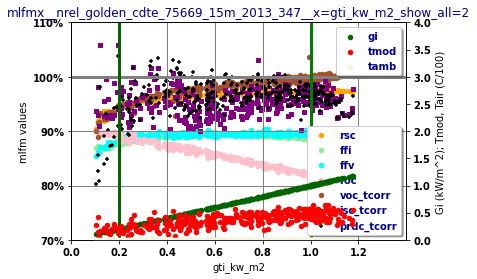

Fig 1 : MLFM values for 1 module vs. gti_kw_m2 (x) : 0.1gi1.2_0.1lfm


In [37]:
# choose xaxis - can be any column in norm
xaxis_sel = 'gti_kw_m2' 

plot_mlfm_xaxis(
            xaxis_name    = xaxis_sel,  
            dframe        = norm, 
            dfilename     = meas_filename,
            dfilter       = user_filter ,           
            show_lfm_vals = 2,   # 1=roc-voc, 2= ++isc,prdc, 3= ++curves, 4= ++tcorr
            
            save_graphs   = True,
                                 # units     usual limits    comments
            ymax          = 1.1, #        1.0 < ymax < 1.1 , higher if predegradation 
            ymin          = 0.7, #        0.5 < ymin < 0.8 , lower if degraded
            xmax          = 1.1, # kW/m2        xmax < 1.1 
            xmin          = 0.0, # kW/m2  0.0 < xmin
            )
            
print ('Fig 1 : MLFM values for 1 module vs. ' + xaxis_sel + ' (x) : ' + user_filter )

####  Fig 2: Plot 1 LFM value (y-axis) vs. xaxis and colour axis


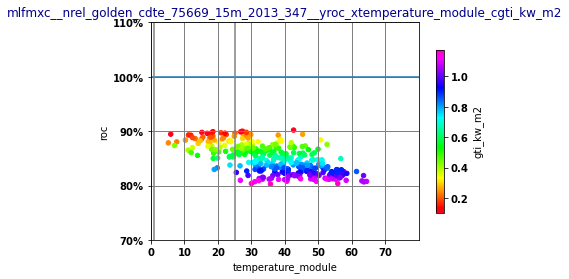

Fig 2 : MLFM roc(y) vs. temperature_module (x) coloured by gti_kw_m2 : 0.1gi1.2_0.1lfm


In [38]:
# choose xaxis, yaxis and caxis columns from norm
yaxis_sel  = 'roc' #
xaxis_sel  = 'temperature_module'  
caxis_sel  = 'gti_kw_m2'           

plot_mlfm_xaxis_caxis(
    yaxis_name    = yaxis_sel, 
    xaxis_name    = xaxis_sel,  
    caxis_name    = caxis_sel, 
    dframe        = norm,
    dfilename     = meas_filename,
    dfilter       = user_filter,
    save_graphs   = True,  
                         #           usual limits     comments
    ymax          = 1.1, #        1.0 < ymax < 1.1 , higher if predegradation 
    ymin          = 0.7, #        0.5 < ymin < 0.8 , lower if degraded
    xmax          = 1.1, # kW/m2        xmax < 1.1 
    xmin          = 0.0, # kW/m2  0.0 < xmin
    )

print ('Fig 2 : MLFM ' + yaxis_sel + '(y) vs. ' + 
       xaxis_sel + ' (x) coloured by ' + caxis_sel + ' : ' + user_filter)